# CIFAR 10 homework
### 使用keras中任何套件,訓練出一組辨識cifar10圖像的模型，辨識率越高越好。
### cafar10 共分為10的類別，編號參考以下圖片，airplane編號為0、automobile編號為1......，以此類推。

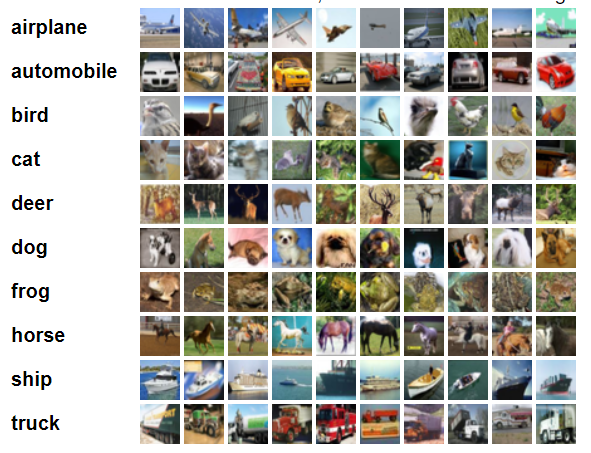

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D,Input
import matplotlib.pylab as plt
import numpy as np
from keras.layers import Convolution2D

C:\Users\adm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料前處理

In [2]:
from keras.datasets import cifar10

num_classes = 10

# input image dimensions
img_rows, img_cols = 32, 32
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1,img_rows, img_cols,3))
x_test = x_test.reshape((-1,img_rows, img_cols,3))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# 訓練樣本展示

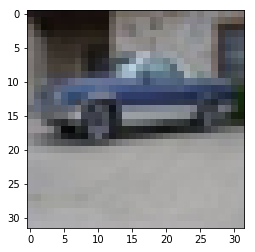

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
num = 10000
plt.imshow(x_train[num])
plt.show()
print (y_train[num])

# 模型建立

In [6]:
input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 4)         112       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               200832    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# 模型訓練

In [7]:
epochs = 2 #整批數據訓練次數
batch_size = 32 #一次訓練張數

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 116s 2ms/step - loss: 1.7383 - acc: 0.3738 - val_loss: 1.5103 - val_acc: 0.4566
Epoch 2/2
10000/10000 [==============================] - 8s 781us/step
Test loss: 1.349799981689453
Test accuracy: 0.5266


# 訓練結果展示

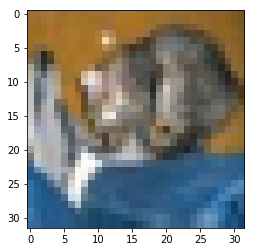

output [0.02554896 0.00393507 0.09704996 0.40801218 0.01274754 0.31685793
 0.02680334 0.01100565 0.08769119 0.01034833]
result [3]
truth [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


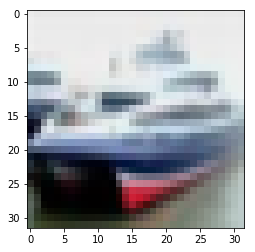

output [4.5492816e-01 9.2189796e-02 1.8147334e-04 8.0045511e-06 4.5120923e-05
 1.0150812e-06 9.7560974e-07 4.2493284e-06 4.2301574e-01 2.9625459e-02]
result [0]
truth [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


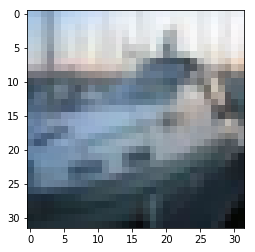

output [2.9217240e-01 5.8581285e-02 1.2496868e-02 3.0120683e-03 3.9438857e-03
 1.0129899e-03 3.1812704e-04 7.2247151e-04 5.8254981e-01 4.5190077e-02]
result [8]
truth [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


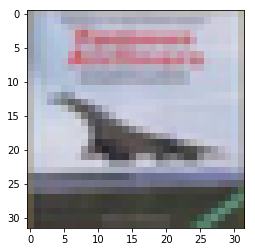

output [6.3923001e-01 5.0987191e-03 1.0952024e-02 1.9000108e-04 1.5402166e-03
 3.1515938e-05 3.1956664e-05 4.2897944e-05 3.4065655e-01 2.2261932e-03]
result [0]
truth [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


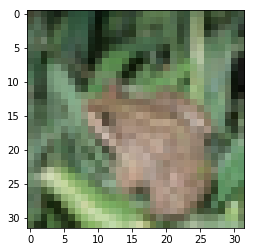

output [0.00086331 0.00047793 0.10774571 0.34045932 0.18860781 0.23104791
 0.11260293 0.01705992 0.00058513 0.00055001]
result [3]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


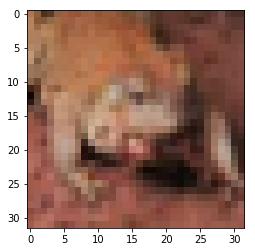

output [0.01351576 0.04395315 0.06770671 0.10829731 0.05496638 0.07982472
 0.53596234 0.03940828 0.01549031 0.04087509]
result [6]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


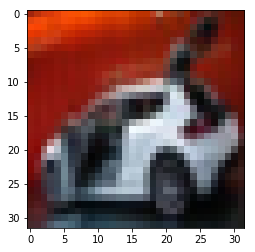

output [0.03535611 0.718477   0.02518894 0.02018592 0.00784619 0.02065185
 0.01842079 0.00717917 0.048033   0.09866104]
result [1]
truth [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


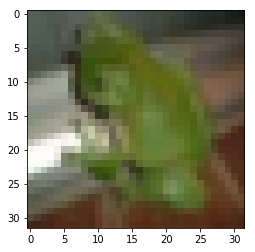

output [0.02027253 0.00198329 0.25002316 0.07898394 0.23781209 0.07010461
 0.30502963 0.0244743  0.00917878 0.00213766]
result [6]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


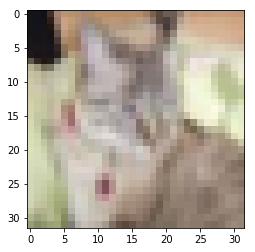

output [0.05324246 0.00515937 0.11123526 0.2810219  0.11676943 0.31257755
 0.03133231 0.07037955 0.01175774 0.00652437]
result [5]
truth [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


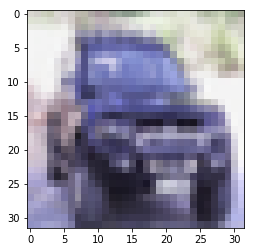

output [1.0402471e-02 9.0108949e-01 1.3426013e-04 7.1185299e-05 2.5919664e-05
 1.6377850e-05 3.2878332e-05 3.0565650e-05 1.5483082e-02 7.2713815e-02]
result [1]
truth [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
import numpy as np
test_data = x_test[0:10] #第1-10比測試資料
truth = y_test[0:10]
test_result=model.predict(test_data)
for i in range (test_result.shape[0]):
    plt.imshow(test_data[i])
    plt.show()
    print ('output',test_result[i])
    print ('result',np.where(test_result[i]==test_result[i].max())[0])
    print ('truth',truth[i])